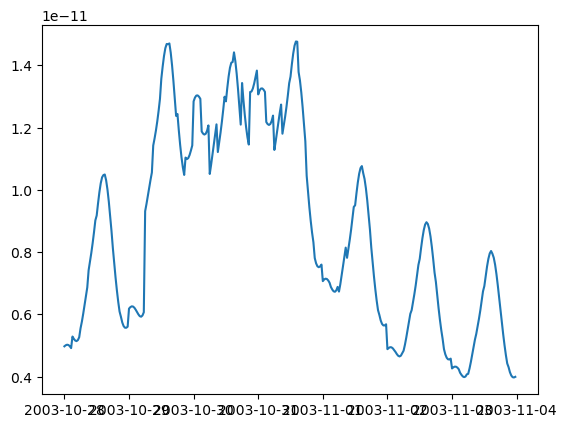

In [1]:
import numpy as np
from pymsis import msis

dates = np.arange(np.datetime64("2003-10-28T00:00"), np.datetime64("2003-11-04T00:00"), np.timedelta64(30, "m"))
# geomagnetic_activity=-1 is a storm-time run
data = msis.run(dates, 0, 0, 400, geomagnetic_activity=-1)

# Plot the data
import matplotlib.pyplot as plt
# Total mass density over time
plt.plot(dates, data[:, 0, 0, 0, 0])
plt.show()

In [69]:
import matplotlib.pyplot as plt
import numpy as np

from pymsis import msis


lon = 0
lat = 70
alts = np.linspace(200, 1000, 800)
f107 = 150
f107a = 150
ap = 7
aps = [[ap] * 7]

date = np.datetime64("2005-08-25T00:00")
output_midnight = msis.run(date, lon, lat, alts, f107, f107a, aps)
date = np.datetime64("2005-08-25T12:00")
output_noon = msis.run(date, lon, lat, alts, f107, f107a, aps)

#  output is now of the shape (1, 1, 1, 1000, 11)
# Get rid of the single dimensions
output_midnight = np.squeeze(output_midnight)
output_noon = np.squeeze(output_noon)

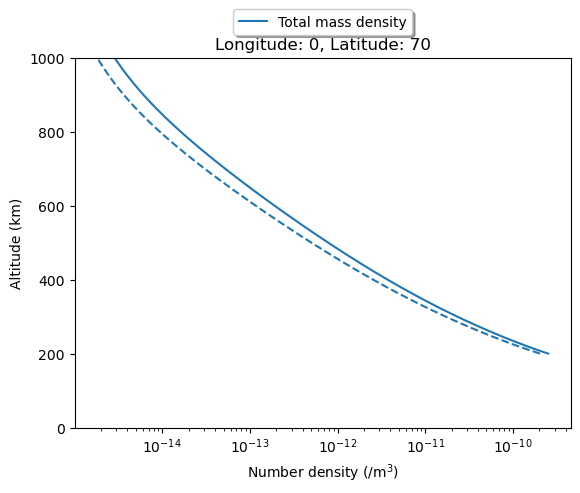

In [70]:
variables = [
    "Total mass density",
    "N2",
    "O2",
    "O",
    "He",
    "H",
    "Ar",
    "N",
    "Anomalous O",
    "NO",
    "Temperature",
]

_, ax = plt.subplots()
for i, label in enumerate(variables):
    if label != "Total mass density":
        # There is currently no NO data, also ignore non-number densities
        continue
    (line,) = ax.plot(output_midnight[:, i], alts, linestyle="--")
    ax.plot(output_noon[:, i], alts, c=line.get_color(), label=label)

ax.legend(
    loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4
)
ax.set_title(f"Longitude: {lon}, Latitude: {lat}")
ax.set_xscale("log")
ax.set_ylim(0, 1000)
ax.set_xlabel("Number density (/m$^3$)")
ax.set_ylabel("Altitude (km)")

plt.show()

In [80]:
from scipy.optimize import curve_fit

#def exp(x, rho_0, h_sc, c):
#    return rho_0 * np.exp(-1 * x / h_sc) + c 

def exp1(x, a, b, c):
    return a * np.exp(-1 * np.power(x/b,2)) + c

#def exp1(x, a, b, c):
#    return a * np.exp(-b * x) + c

def lin(x, a, c):
    return a * x + c

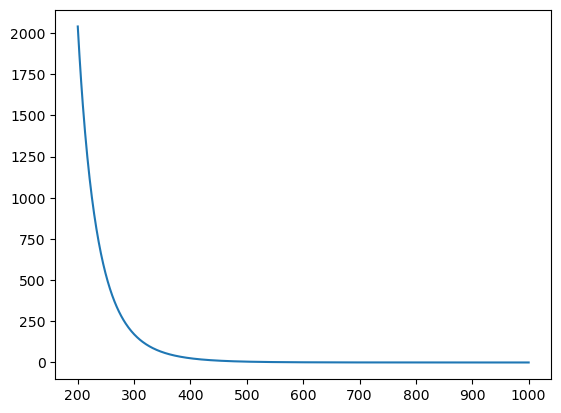

In [77]:
y =output_midnight[:, 0]*10E12
x =alts

plt.plot(x,y)



[-7.55890632 20.98014246]


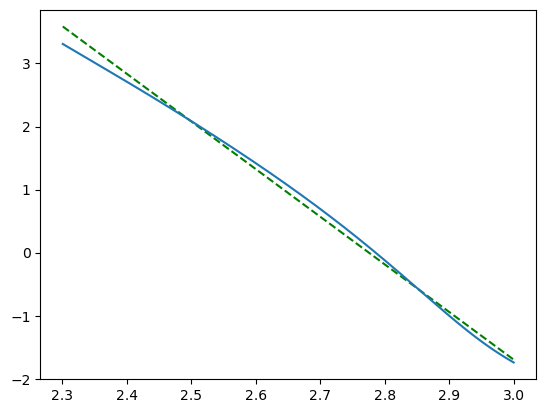

In [78]:
ylog = np.log10(y)
xlog = np.log10(x)

popt, pcov = curve_fit(lin, xlog, ylog)
print(popt)

_, ax1 = plt.subplots()
ax1.plot(xlog, lin(xlog, *popt), 'g--')
ax1.plot(xlog,ylog)

#ax1.set_yscale("log")
#ax1.set_xscale("log")

[1. 1.]


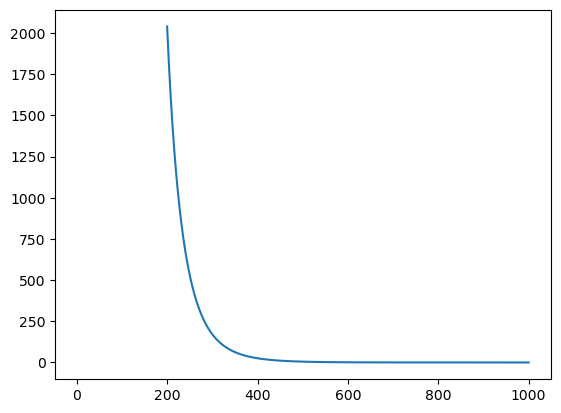

In [83]:
popt, pcov = curve_fit(exp1, x, y, method='dogbox')
print(popt)

_, ax1 = plt.subplots()
ax1.plot(xlog, exp1(x, *popt), 'g--')
ax1.plot(x,y)